# Project Objective: 
### To develop a supervised machine learning model to identify which borrowers will payoff their loans. Strategy for loan approval and profitable target market can be identified.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data = pd.read_csv("lending_club_loan_two.csv")

In [4]:
data

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


### This is a large dataset, which has ~396000 observations as shown below.  Noted that they are float and object data type. 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

### Visualizing loan payoff vs chargeoff. 

<AxesSubplot:xlabel='loan_status', ylabel='count'>

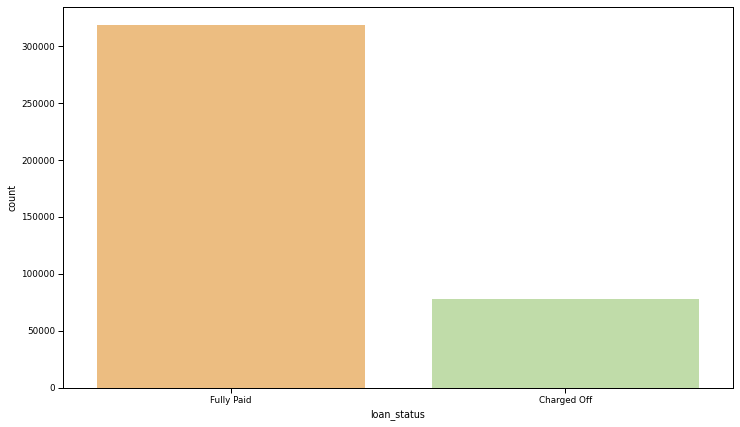

In [6]:
plt.figure(figsize=(12,7))
sns.set_context("paper")
sns.countplot(x="loan_status", data=data, palette="Spectral")

### Descriptive analysis and correlation of features. 

<AxesSubplot:>

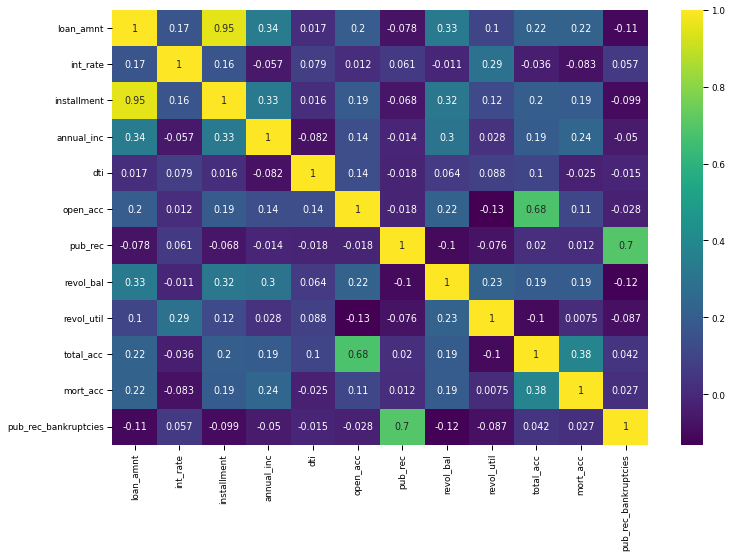

In [7]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='viridis')

In [18]:
matrix_corr = data.corr()

pandas.core.frame.DataFrame

### Noted that loan amount and interest rate has high correlation,, which is expected. Total account & open account also has high correlation. Lastly, public record and bankcruptcies, which also makes sense. 

### Visualizing the relationship between installment and loan amount.

### Visualizing the relationship between the grade and loan status. As expected, borrowers tend to have a higher charged off in lower grade categories. This shows that the grade can potentially be a good indicator if the borrower has the ability to payoff or default.  

<AxesSubplot:xlabel='grade', ylabel='count'>

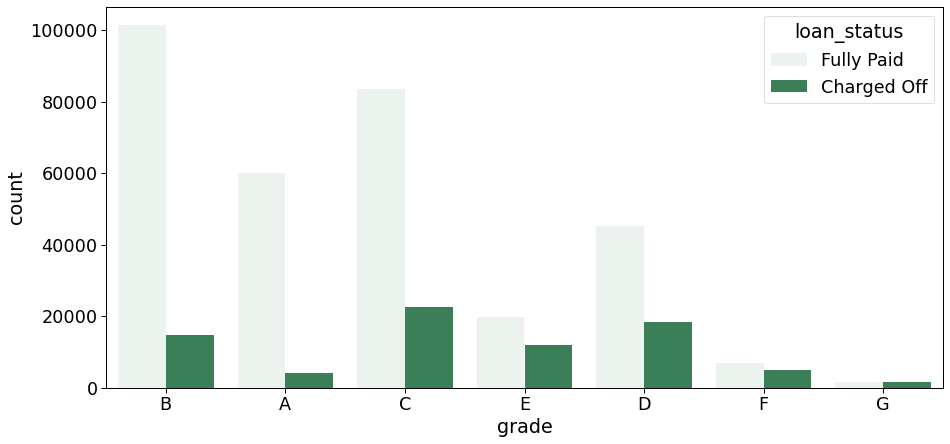

In [7]:
plt.figure(figsize=(15,7))
sns.set_context("paper", font_scale=2)
sns.countplot(x="grade", data=data, hue="loan_status", color="seagreen")

### Visualizing in a sorted order of grade gives a better understanding of the impact of grade in loan status. The lower the grade, the higher the ratio in fully paid to charged off.

<AxesSubplot:xlabel='grade', ylabel='count'>

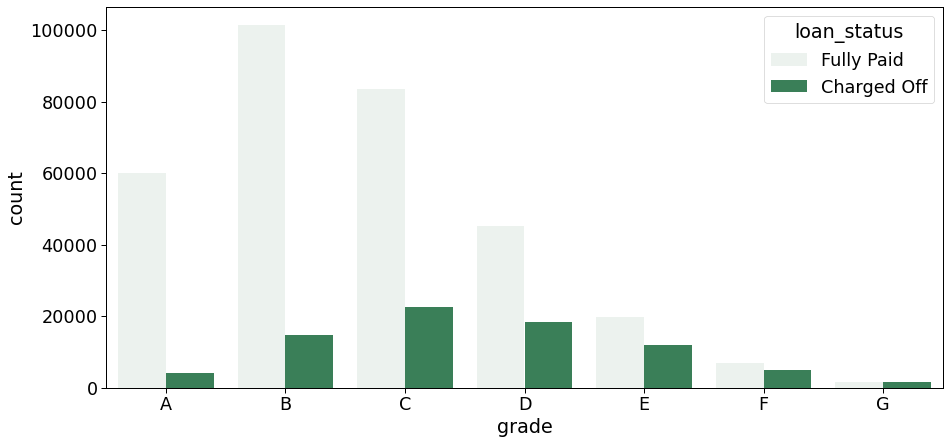

In [8]:
plt.figure(figsize=(15,7))
sns.set_context("paper", font_scale=2)
sorted_grade = sorted(data["grade"].unique())
sns.countplot(x="grade'", data=data, hue="loan_status", color="seagreen", order=sorted_grade)

<AxesSubplot:xlabel='grade'>

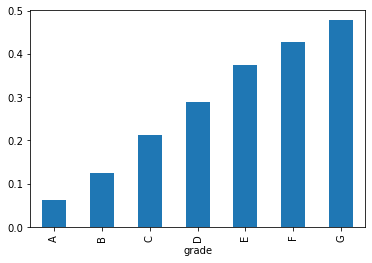

In [5]:
grade_co = data[data["loan_status"] == "Charged Off"].groupby("grade").count()["loan_status"]
grade_fp = data[data["loan_status"] == "Fully Paid"].groupby("grade").count()["loan_status"]


grade_graph = grade_co/(grade_co+grade_fp)

grade_graph.plot(kind="bar")

In [12]:
type(grade_graph)

pandas.core.series.Series

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

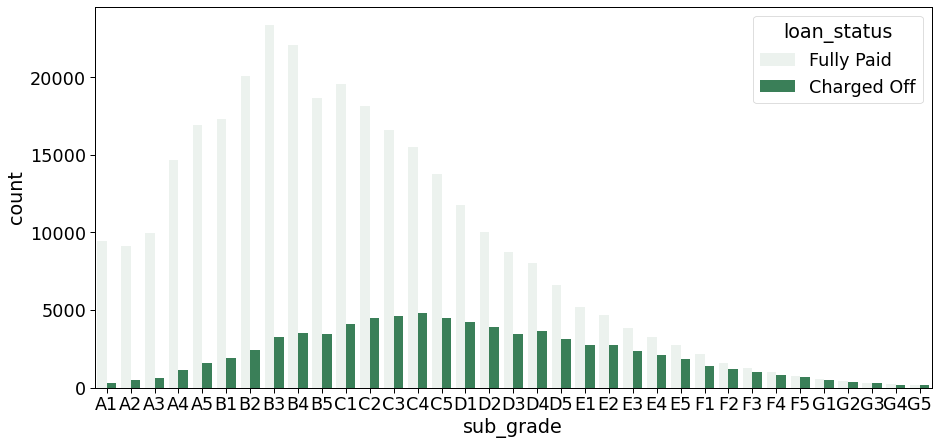

In [10]:
plt.figure(figsize=(15,7))
sns.set_context("paper", font_scale=2)
sorted_sub_grade = sorted(data["sub_grade"].unique())
sns.countplot(x="sub_grade", data=data, hue="loan_status", color="seagreen", order=sorted_sub_grade)

<AxesSubplot:xlabel='sub_grade'>

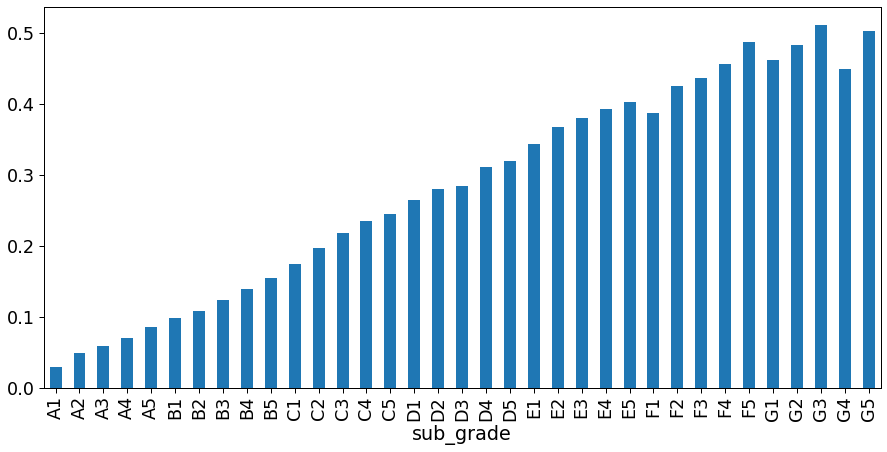

In [11]:
sub_grade_co = data[data["loan_status"] == "Charged Off"].groupby("sub_grade").count()["loan_status"]
sub_grade_fp = data[data["loan_status"] == "Fully Paid"].groupby("sub_grade").count()["loan_status"]


sub_grade_graph = sub_grade_co/(sub_grade_co+sub_grade_fp)

plt.figure(figsize=(15,7))

sub_grade_graph.plot(kind="bar")

<AxesSubplot:xlabel='verification_status', ylabel='count'>

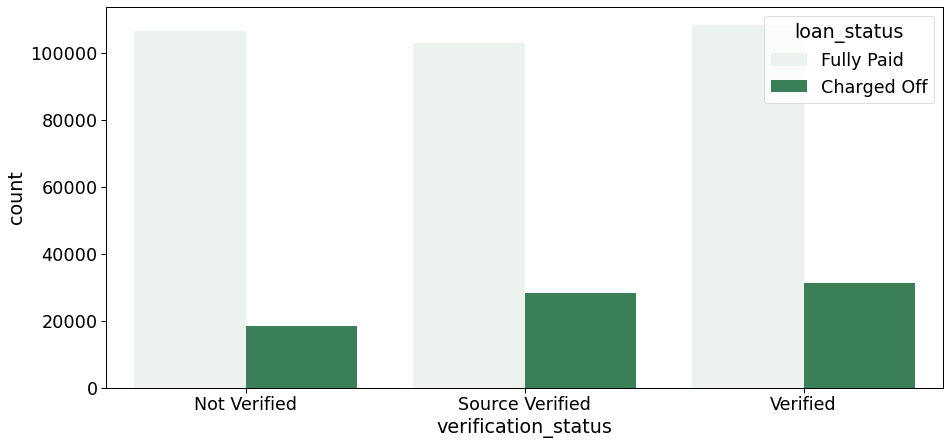

In [12]:
plt.figure(figsize=(15,7))
sns.set_context("paper", font_scale=2)
sorted_verification_status = sorted(data["verification_status"].unique())
sns.countplot(x="verification_status", data=data, hue="loan_status", color="seagreen", order=sorted_verification_status)

<AxesSubplot:xlabel='verification_status'>

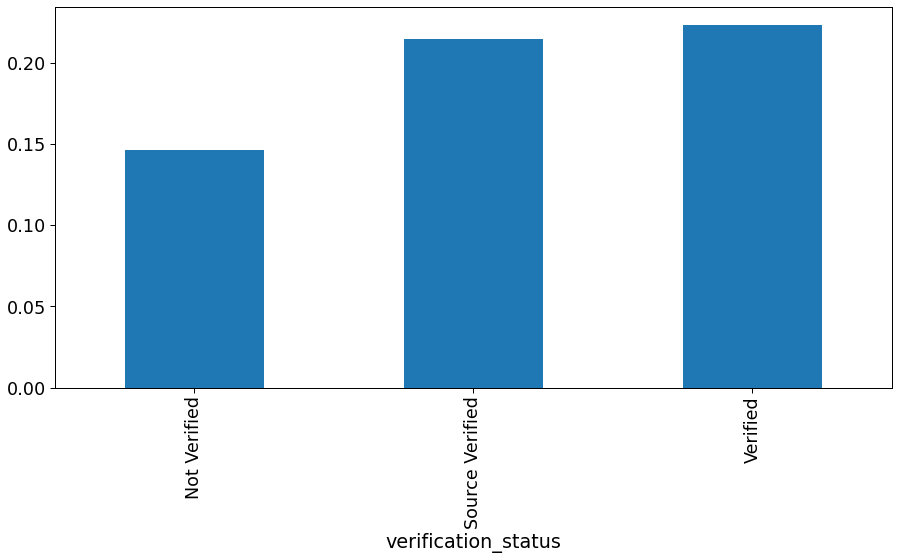

In [13]:
verification_status_co = data[data["loan_status"] == "Charged Off"].groupby("verification_status").count()["loan_status"]
verification_status_fp = data[data["loan_status"] == "Fully Paid"].groupby("verification_status").count()["loan_status"]

verification_status_graph = verification_status_co/(verification_status_co+verification_status_fp)

plt.figure(figsize=(15,7))

verification_status_graph.plot(kind="bar")

In [14]:
data["verification_status"] = data["verification_status"].replace(["Verified", "Source Verified"], "Verified")

<AxesSubplot:xlabel='int_rate', ylabel='Count'>

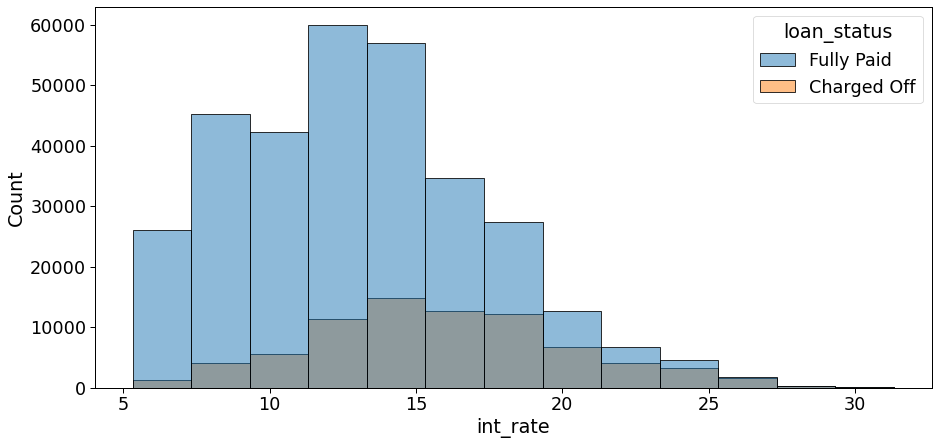

In [14]:
plt.figure(figsize=(15,7))
sns.set_context("paper", font_scale=2)
sorted_int_rate = sorted(data["int_rate"].unique())
sns.histplot(x="int_rate", data=data, hue="loan_status", color="seagreen",binwidth= 2)

In [16]:
data["loan_status"].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

In [17]:
data["loan_repaid"] = data["loan_status"].map({"Fully Paid":1, "Charged Off":0})

In [18]:
data[["loan_repaid", "loan_status"]]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


### Visualizing the correlation between "loan repaid" and other features. Noted that interest rate has relatively high correlation compared to the rest. This is expected as the higher the interest rate, the harder it is to pay off a loan.

<AxesSubplot:>

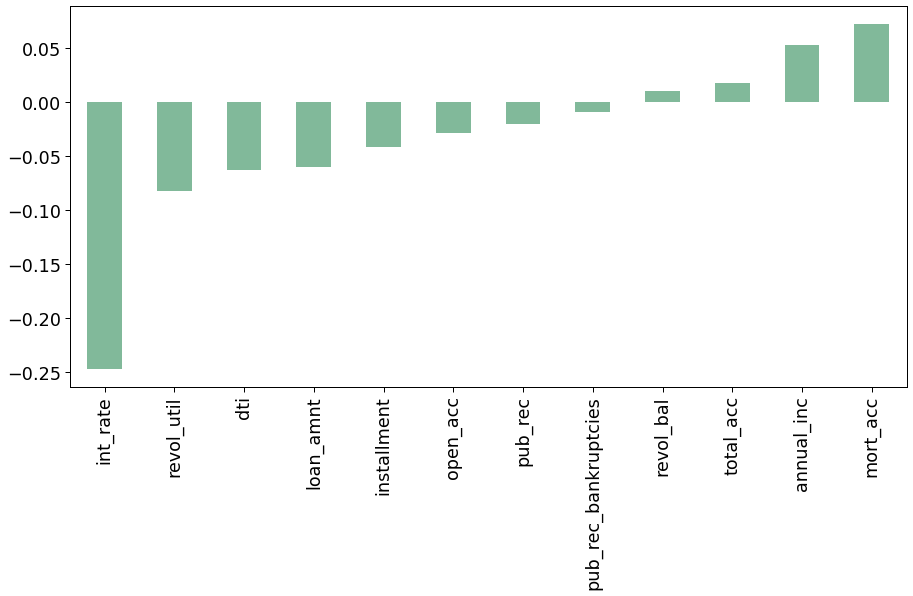

In [19]:
plt.figure(figsize=(15,7))
data.corr()["loan_repaid"].sort_values().drop("loan_repaid").plot(kind="bar", color="seagreen", alpha=0.6)

### Dealing with missing values. The number of features that have missing values is shown below. The number of missing values in each feature will determine the treatment of the feature; to drop or replace it with some other values. 

In [20]:
data.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [21]:
data.isnull().sum() / len(data) * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [22]:
data["emp_title"].nunique()

173105

In [23]:
data["emp_title"].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

### The employment title feature has >170000 unique values. It is not feasible to keep them as a feature to be used in our machine learning model. Will just drop it. 

In [24]:
data = data.drop("emp_title", axis=1)

In [25]:
sorted(data["emp_length"].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [26]:
sorted_emp_length = ['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

### Visualizing the employment length feature. It appears that most of the borrowers have >10yrs employment length, meaning most of the borrowers are middle-aged adults and/or matured instead of young adults. 

<AxesSubplot:xlabel='emp_length', ylabel='count'>

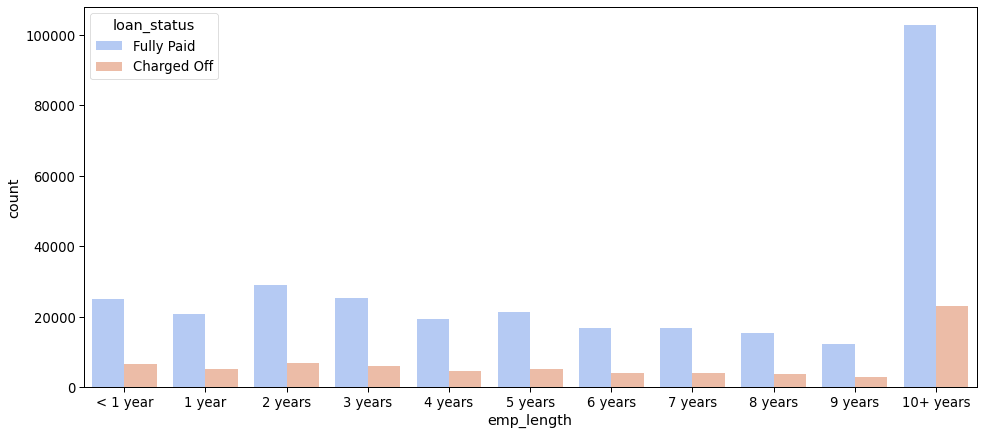

In [27]:
plt.figure(figsize=(16,7))
sns.set_context("paper", font_scale=1.5)
sns.countplot(x="emp_length", data=data, hue="loan_status", order=sorted_emp_length, palette="coolwarm")

In [28]:
emp_co = data[data["loan_status"] == "Charged Off"].groupby("emp_length").count()["loan_status"]
emp_fp = data[data["loan_status"] == "Fully Paid"].groupby("emp_length").count()["loan_status"]

In [29]:
emp_length_graph = emp_co/(emp_co+emp_fp)

### Visualizing the number of charged off and total borrowers in percentage in each intervals of employment length. They are relatively the same across the board shown in the graph below.

<AxesSubplot:xlabel='emp_length'>

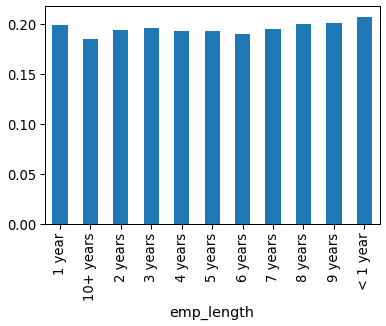

In [30]:
emp_length_graph.plot(kind="bar")

### The employment length feature does not really help us to distinguish borrowers who payoff or default. Will just drop. 

In [31]:
data = data.drop("emp_length", axis=1)

In [32]:
data.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [33]:
data["purpose"].value_counts()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

In [34]:
data["purpose"].nunique()

14

### Visualizing the loan purpose feature. It is apparent that top reason to borrow loans from Lending Club is debt consolidation as provided by borrowers. This is matches with common perception that people often attempt to pay off high interest rate credit card accounts with unsecured personal loan.

<AxesSubplot:xlabel='purpose', ylabel='count'>

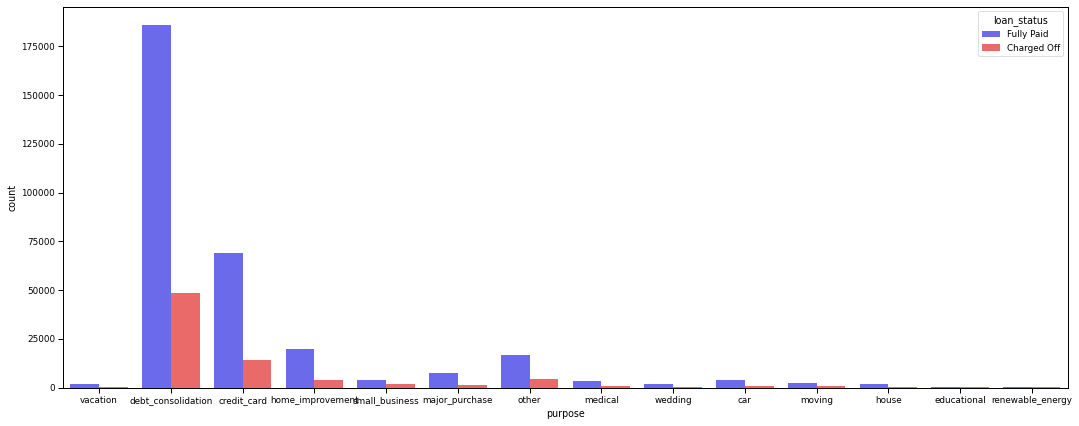

In [35]:
plt.figure(figsize=(18,7))
sns.set_context("paper", font_scale=1)
sns.countplot(x="purpose", data=data, hue="loan_status", palette="seismic")

In [36]:
data["title"].value_counts()

Debt consolidation            152472
Credit card refinancing        51487
Home improvement               15264
Other                          12930
Debt Consolidation             11608
                               ...  
Graduation/Travel Expenses         1
Daughter's Wedding Bill            1
gotta move                         1
creditcardrefi                     1
Toxic Debt Payoff                  1
Name: title, Length: 48817, dtype: int64

### It appears that the feature "title" provides the same information as loan purpose. Will drop this feature. 

In [37]:
data = data.drop("title", axis=1)

In [38]:
data["mort_acc"].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

### Recalling that mortage account feature has ~38000 missing values. This is pretty significant as dropping this feature will significantly reduce the size of the dataset. It is probably a good idea to replace the missing values with some other values. After checking out the correlation of mortageg with other features, it is noted that total account has the highest correlation with mortgage account. it is not surprising that people have more mortgages when they have more accounts. 

In [39]:
data.corr()["mort_acc"].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

### Decided to replace missing values in mortgage account with the mean value based on the total account. 

In [40]:
total_acc_avg = data.groupby("total_acc").mean()["mort_acc"]

In [41]:
def fill_in_mort_acc(total_acc, mort_acc):
    
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return(mort_acc)

### Replacing the missing values with lambda function. 

In [42]:
data["mort_acc"] = data.apply(lambda x: fill_in_mort_acc(x["total_acc"], x["mort_acc"]), axis=1)

### Finding out the current standing of our missing values. Since the remaining 2 features have very low missing values, decided to just drop those missing values as it is more time-saving. 

In [43]:
data.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [44]:
data = data.dropna()

In [45]:
data.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [46]:
data.dtypes

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
loan_repaid               int64
dtype: object

### Dealing with non-numeric type of data

In [47]:
data.select_dtypes(["object"]).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [48]:
data["term"].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

### Grabbing the numeric values "36" and "60".

In [49]:
data["term"] = data["term"].apply(lambda term: int(term[:3]))

In [50]:
data["term"].value_counts()

36    301247
60     93972
Name: term, dtype: int64

### Since sub-grade provides more information than grade, this featue will be dropped. 

In [51]:
data = data.drop("grade", axis=1)

### Preparing the data with binary classification (dummy data).

In [52]:
dummy = pd.get_dummies(data["sub_grade"], drop_first=True)

In [53]:
dummy

,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
396026,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
396027,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396028,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
data = pd.concat([data.drop("sub_grade", axis=1), dummy], axis=1)

In [55]:
data.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,36,11.44,329.48,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,...,0,0,0,0,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Verified,Jan-2015,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,...,0,0,0,0,0,0,0,0,0,0


In [56]:
data["verification_status"].value_counts()

Verified        270752
Not Verified    124467
Name: verification_status, dtype: int64

In [57]:
data["application_type"].value_counts()

INDIVIDUAL    394508
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [58]:
data["initial_list_status"].value_counts()

f    237346
w    157873
Name: initial_list_status, dtype: int64

In [59]:
dummy = pd.get_dummies(data[["verification_status", "application_type", "initial_list_status", "purpose"]], drop_first=True)
data = pd.concat([data.drop(["verification_status", "application_type", "initial_list_status", "purpose"], axis=1), dummy], axis=1)

In [60]:
data.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,issue_d,loan_status,dti,earliest_cr_line,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10000.0,36,11.44,329.48,RENT,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,...,0,0,0,0,0,0,0,0,1,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,...,0,0,0,0,0,0,0,0,0,0


In [61]:
data["home_ownership"].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [62]:
data["home_ownership"] = data["home_ownership"].replace(["NONE", "ANY"], "OTHER")

In [63]:
data["home_ownership"].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [64]:
dummy = pd.get_dummies(data["home_ownership"], drop_first=True)
data = pd.concat([data.drop("home_ownership", axis=1), dummy], axis=1)

In [65]:
data.head()

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,OTHER,OWN,RENT
0,10000.0,36,11.44,329.48,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,16.0,...,0,0,0,0,0,1,0,0,0,1
1,8000.0,36,11.99,265.68,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,17.0,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,13.0,...,0,0,0,0,0,0,0,0,0,1
3,7200.0,36,6.49,220.65,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,6.0,...,0,0,0,0,0,0,0,0,0,1
4,24375.0,60,17.27,609.33,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,13.0,...,0,0,0,0,0,0,0,0,0,0


##### Four more features with object as data type to deal with.

In [66]:
data.select_dtypes("object").columns

Index(['issue_d', 'loan_status', 'earliest_cr_line', 'address'], dtype='object')

In [67]:
data["address"].value_counts()

USCGC Smith\r\nFPO AE 70466                            8
USS Smith\r\nFPO AP 70466                              8
USS Johnson\r\nFPO AE 48052                            8
USNS Johnson\r\nFPO AE 05113                           8
USNS Johnson\r\nFPO AP 48052                           7
                                                      ..
43570 Maxwell Field Apt. 502\r\nEast John, NH 22690    1
9983 Turner Cove\r\nSouth Gregmouth, WV 70466          1
1312 Cody Shoal\r\nRalphfurt, CO 29597                 1
3841 Liu Crest\r\nClarkchester, NC 29597               1
787 Michelle Causeway\r\nBriannaton, AR 48052          1
Name: address, Length: 392898, dtype: int64

#### Address has no values in our machine learning model but the ZIP code may have some sort of influence in the outcome. Grabbing the ZIP code from the address. 

In [68]:
data["zip_code"] = data["address"].apply(lambda address: address[-5:])

In [69]:
data["zip_code"].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

#### Noted that the newly engineered feature of ZIP has only a few unique counts so it is feasible to keep this feature. Getting dummy data on this feature. 

In [70]:
dummy = pd.get_dummies(data["zip_code"], drop_first=True)
data = pd.concat([data.drop("zip_code", axis=1), dummy], axis=1)

In [71]:
data.head()

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,...,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,329.48,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,16.0,...,1,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,17.0,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,13.0,...,1,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,6.0,...,1,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,13.0,...,0,0,1,0,0,0,0,0,0,0


In [72]:
data = data.drop("address", axis=1)

In [73]:
data = data.drop("issue_d", axis=1)

In [74]:
data["earliest_cr_line"].value_counts()

Oct-2000    3013
Aug-2000    2930
Oct-2001    2890
Aug-2001    2879
Nov-2000    2729
            ... 
Jul-1955       1
Oct-1950       1
May-1958       1
Nov-1955       1
Aug-1959       1
Name: earliest_cr_line, Length: 684, dtype: int64

#### The feature "Earliest credit line" may be a key factor as it provides some sort of a time series information. Grabbing the year as our tim series feature. 

In [75]:
data["earliest_cr_line"] = data["earliest_cr_line"].apply(lambda year: int(year[-4:]))

In [76]:
data["earliest_cr_line"].value_counts()

2000    29302
2001    29031
1999    26444
2002    25849
2003    23623
        ...  
1951        3
1950        3
1953        2
1944        1
1948        1
Name: earliest_cr_line, Length: 65, dtype: int64

In [77]:
data.select_dtypes("object").columns

Index(['loan_status'], dtype='object')

#### Recalling that we have converted "fully paid" and "charged off" with binary digits, it is safe to just drop the original feature. 

In [78]:
data = data.drop("loan_status", axis=1)

#### Data cleansing process and feature-engineering complete. The dataset now has 79 features. Now preparing for training data and test data. 

In [79]:
data.head(3)

,loan_amnt,term,int_rate,installment,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,...,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,329.48,117000.0,26.24,1990,16.0,0.0,36369.0,...,1,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,65000.0,22.05,2004,17.0,0.0,20131.0,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,12.79,2007,13.0,0.0,11987.0,...,1,1,0,0,0,0,0,0,0,0


In [84]:
data.to_csv('data_analyzed.csv',index = False)